# ARIMA

## 1. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# mengganti tema plot menjadi dark
import os
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
%matplotlib inline

## 2. Data

In [2]:
data = pd.read_csv('lisong.csv', index_col='Produksi Hasil Tangkap Laut', parse_dates=True)
data.index.freq = 'MS'
data

,Lisong
Produksi Hasil Tangkap Laut,
2017-01-01,9.20
2017-02-01,9.30
2017-03-01,8.99
2017-04-01,9.11
2017-05-01,9.43
2017-06-01,9.71
2017-07-01,9.28
2017-08-01,9.34
2017-09-01,8.92


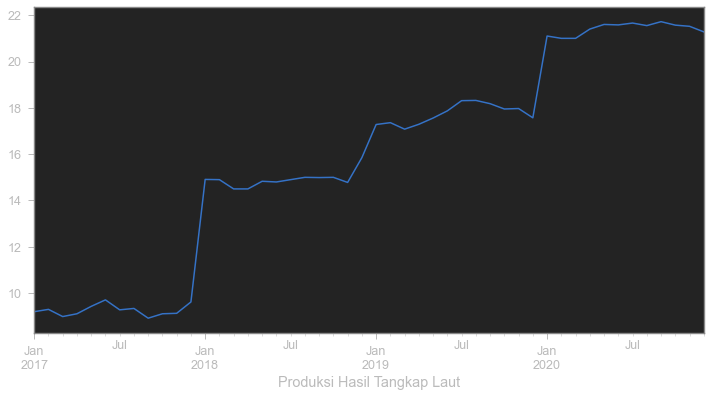

In [3]:
data['Lisong'].plot(figsize=(12,6));

## 3. Check Stationarity Data

In [4]:
# augmented dickey-fuller test function
def adfuller_test(series):
    """
    Pass time series, returns ADF report
    """
    print("Augmented Dickey-Fuller Test:")
    result = adfuller(series.dropna())
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    output = pd.Series(result[:4], index=labels)
    
    for key,val in result[4].items():
        output[f'critical value ({key})'] = val
    print(output.to_string())
    
    if result[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Accept the null hypothesis")
        print("Data has a unit root and is non-stationary")

# try in our data
adfuller_test(data['Lisong'])

Augmented Dickey-Fuller Test:
ADF test statistic      -0.980238
p-value                  0.760404
# lags used              0.000000
# observations          47.000000
critical value (1%)     -3.577848
critical value (5%)     -2.925338
critical value (10%)    -2.600774

Weak evidence against the null hypothesis
Accept the null hypothesis
Data has a unit root and is non-stationary


Data is NON-stationary! Lakukan differencing

## 4. Differencing

In [5]:
data['Lisong d1'] = diff(data['Lisong'], k_diff=1)     #lag 1
# cek stationarity again
adfuller_test(data['Lisong d1'])

Augmented Dickey-Fuller Test:
ADF test statistic     -6.764151e+00
p-value                 2.744181e-09
# lags used             0.000000e+00
# observations          4.600000e+01
critical value (1%)    -3.581258e+00
critical value (5%)    -2.926785e+00
critical value (10%)   -2.601541e+00

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Data is STATIONARY!

Karena dilakukan differencing, modelnya adalah ARIMA/SARIMA

## 5. Check Seasonality Data

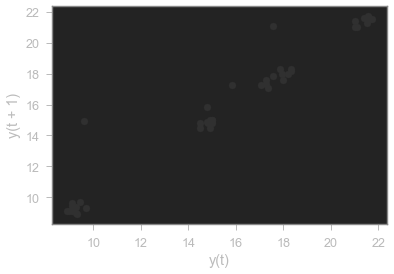

In [6]:
# With lag plot
lag_plot(data['Lisong']);

terlihat trend naik tetapi seasonality tidak diketahui

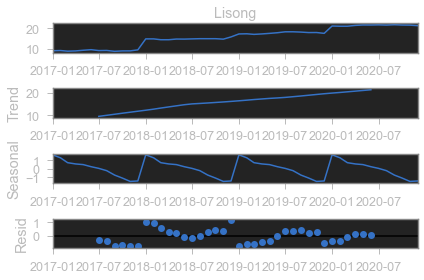

In [7]:
# With ETS (Error, Trend, Seasonality)
result = seasonal_decompose(data['Lisong'].dropna(), model='add')  # model='add' for linear
result.plot();

ADA SEASONALITY, maka gunakan SARIMA MODEL

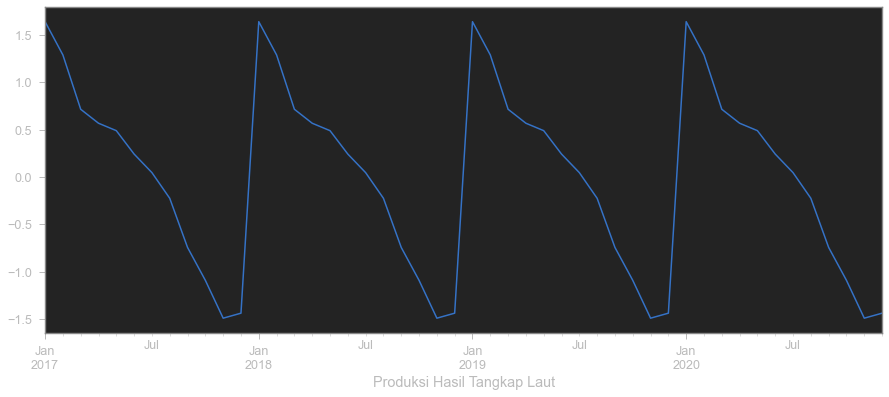

In [8]:
# lihat range seasonalitynya
result.seasonal.plot(figsize=(15,6));

sesoanality terjadi setiap tahun --> m=12

## 6. Find (p,d,q)(P,D,Q)SARIMA Model

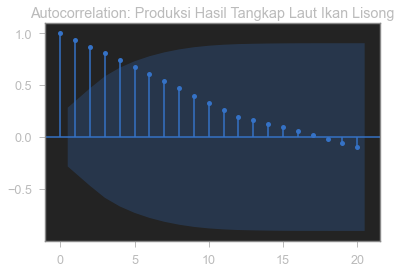

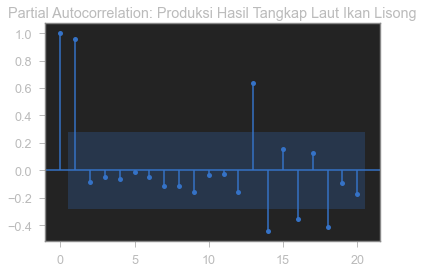

In [9]:
# Plot ACF
lags = 20
title = 'Autocorrelation: Produksi Hasil Tangkap Laut Ikan Lisong'
plot_acf(data['Lisong'],title=title,lags=lags);
# PLOT PACF
lags = 20
title = 'Partial Autocorrelation: Produksi Hasil Tangkap Laut Ikan Lisong'
plot_pacf(data['Lisong'],title=title,lags=lags);

In [10]:
# autoarima
auto_arima(data['Lisong'], seasonal=True, stationary=False, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=133.064, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=124.045, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=133.228, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=134.350, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=135.042, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=133.309, Time=0.07 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=123.580, Time=0.10 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=131.597, Time=0.20 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.57

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

Karena (p,q) = (0,0) gabisa maka lihat penentuan berikut:

> <em>If the PACF of a differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive, while the ACF decays more slowly--then consider adding an **AR** terms to the model. Meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms. The lag at which the PACF cuts off is indicated number of AR terms.</em><br>

Karena terjadi hal tsb, maka gunakan AR(1) dan MA(0)/MA(1). Untuk MA, lihat yg memiliki less error. Ternyata SARIMA(1,1,0)(1,0,0,12) memiliki less error. Maka gunakan SARIMA(1,1,0)(1,0,0,12)

## 7. Split Data

In [11]:
# Ingin memprediksi 6 bulan berikutnya
train_data = data['Lisong'].iloc[:-6]
test_data = data['Lisong'].iloc[-6:]

train_data, test_data

(Produksi Hasil Tangkap Laut
 2017-01-01     9.20
 2017-02-01     9.30
 2017-03-01     8.99
 2017-04-01     9.11
 2017-05-01     9.43
 2017-06-01     9.71
 2017-07-01     9.28
 2017-08-01     9.34
 2017-09-01     8.92
 2017-10-01     9.11
 2017-11-01     9.13
 2017-12-01     9.62
 2018-01-01    14.91
 2018-02-01    14.90
 2018-03-01    14.50
 2018-04-01    14.50
 2018-05-01    14.83
 2018-06-01    14.80
 2018-07-01    14.90
 2018-08-01    15.00
 2018-09-01    14.99
 2018-10-01    15.00
 2018-11-01    14.78
 2018-12-01    15.85
 2019-01-01    17.28
 2019-02-01    17.36
 2019-03-01    17.08
 2019-04-01    17.29
 2019-05-01    17.56
 2019-06-01    17.87
 2019-07-01    18.31
 2019-08-01    18.32
 2019-09-01    18.18
 2019-10-01    17.95
 2019-11-01    17.97
 2019-12-01    17.57
 2020-01-01    21.10
 2020-02-01    21.00
 2020-03-01    21.00
 2020-04-01    21.40
 2020-05-01    21.60
 2020-06-01    21.58
 Freq: MS, Name: Lisong, dtype: float64,
 Produksi Hasil Tangkap Laut
 2020-07-01    21.6

## 8. SARIMA Train Model

SARIMA(1,1,0)(1,0,0,12)

In [12]:
# model SARIMA in train data
model_train_SARIMA = SARIMAX(train_data, order=(1,1,0), seasonal_order=(1,0,0,12)).fit()
model_train_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Lisong   No. Observations:                   42
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -54.811
Date:                            Sun, 12 Dec 2021   AIC                            115.623
Time:                                    20:26:19   BIC                            120.764
Sample:                                01-01-2017   HQIC                           117.495
                                     - 06-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1469      0.215     -0.684      0.494      -0.568       0.274
ar.S.L12       0.7124      0.050     14.335      0.000       0.615       0.810
sigma2         0.6894      0.085      8.102      0.000       0.523       0.856
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               190.80
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             1.98
Prob(H) (two-sided):                  0.20   Kurtosis:                        12.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 9. Test Prediction

In [13]:
start=len(train_data)
end=len(train_data)+len(test_data)-1

prediction_test = model_train_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(1,0,0,12) Prediction')
prediction_test

2020-07-01    21.928827
2020-08-01    21.930756
2020-09-01    21.831783
2020-10-01    21.667819
2020-11-01    21.682083
2020-12-01    21.397121
Freq: MS, Name: SARIMA(1,1,0)(1,0,0,12) Prediction, dtype: float64

Digunakan typ='levels' krn ingin melihat hasil prediksi dari data asli, bukan data yg sudah didifferencing

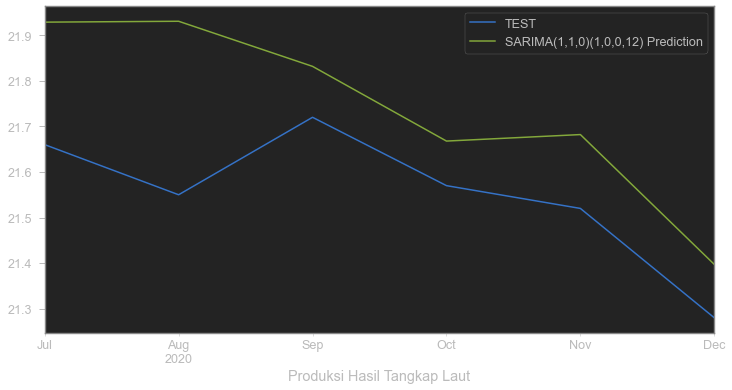

In [14]:
# PLOT
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

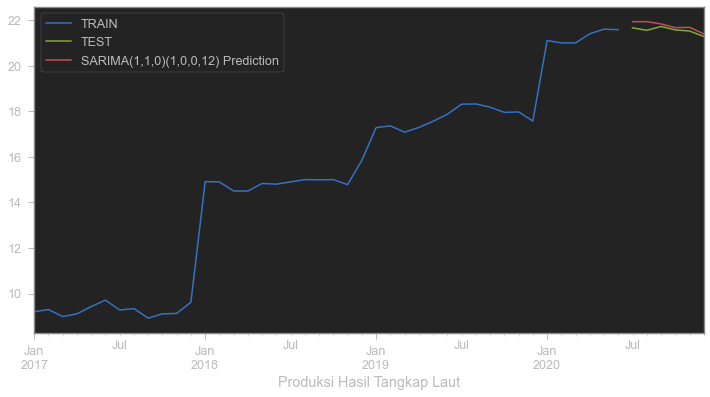

In [15]:
# PLOT
train_data.plot(legend=True, label='TRAIN')
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

## 10. Evaluate Model

In [16]:
print('Mean Train data -->', train_data.mean())
print('Standard Deviation Train data -->', train_data.std())
print('\n')

error = rmse(test_data, prediction_test)
print(f'ARIMA(1,1,0) RMSE Error: {error:11.10}')
aic_values = model_train_SARIMA.aic
print(f'ARIMA(1,1,0) AIC: {aic_values:6.5}')
print('\n')

print('Mean Test data -->', test_data.mean())
print('Mean Prediction results -->', prediction_test.mean())

Mean Train data --> 15.012380952380951
Standard Deviation Train data --> 4.206560387104891


ARIMA(1,1,0) RMSE Error: 0.2157526366
ARIMA(1,1,0) AIC: 115.62


Mean Test data --> 21.55
Mean Prediction results --> 21.739731512976828


Rata-rata train data itu 15, prediksinya menyimpang 0.2 (RMSE). Standar deviasi (statistik yang mengukur penyebaran kumpulan data relatif terhadap rata-rata) train data itu 4, prediksinya menyimpang 0.2 (RMSE). Artinya error tidak menyimpang statistik pada data. Bisa dilihat juga Mean prediction results hampir mirip dgn mean test data. This is good prediction!

## 11. Re-Fit Model to Entire Dataset

In [17]:
model_SARIMA = SARIMAX(data['Lisong'], order=(1,1,0), seasonal_order=(1,0,0,12)).fit()
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Lisong   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -59.106
Date:                            Sun, 12 Dec 2021   AIC                            124.211
Time:                                    20:26:20   BIC                            129.762
Sample:                                01-01-2017   HQIC                           126.300
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1560      0.186     -0.839      0.402      -0.521       0.209
ar.S.L12       0.7426      0.039     19.262      0.000       0.667       0.818
sigma2         0.5898      0.062      9.510      0.000       0.468       0.711
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               253.65
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             1.78
Prob(H) (two-sided):                  0.20   Kurtosis:                        13.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 12. Forecasting The Future

In [18]:
# forecasting the next 6 months
start = len(data)
end = len(data)+5

forecast = model_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(1,0,0,12) Forecast')
forecast

2021-01-01    23.892551
2021-02-01    23.819677
2021-03-01    23.819461
2021-04-01    24.116543
2021-05-01    24.265062
2021-06-01    24.250210
Freq: MS, Name: SARIMA(1,1,0)(1,0,0,12) Forecast, dtype: float64

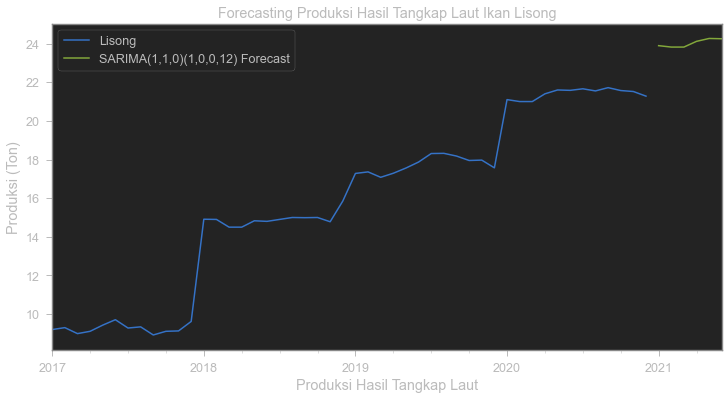

In [19]:
# PLOT
data['Lisong'].plot(legend=True)
forecast.plot(figsize=(12,6), legend=True, title='Forecasting Produksi Hasil Tangkap Laut Ikan Lisong', ylabel='Produksi (Ton)');

Look! Prediksinya naik karena ada seasonality bahwa setiap tahun akan naik nilainya

In [20]:
# save model
model_SARIMA.save('model_lisong.pkl')